**Aqui empieza el análisis de la tabla TMod_Vic**

In [46]:
# from dbfread import DBF
# from pandas import DataFrame

# Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import statistics
from sklearn import linear_model
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [2]:
# Lectura del archivo
victimas = pd.DataFrame(pd.read_csv('TMod_Vic.csv'))

#Muestra los primeros 10 renglones del archivo
victimas.head(10)

,"ID_VIV,C,10","ID_HOG,C,13","ID_PER,C,16","ID_DEL,C,21","UPM,C,7","VIV_SEL,C,7","HOGAR,C,5","ND_TIPO,C,7","TD_TIPO,C,7","BPCOD,C,5",...,"BP6_1,C,5","BP6_2,C,5","BP6_3,C,5","BP7_1,C,5","FAC_DEL,C,7","FAC_DEL_AM,C,10","DOMINIO,C,7","ESTRATO,C,7","EST_DIS,C,7","UPM_DIS,C,7"
0,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.2,100721,3,1,2,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
1,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.01.1,100721,3,1,1,1,1,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
2,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.3,100721,3,1,3,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
3,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.11.1,100721,3,1,1,1,11,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79
4,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.07.1,100721,3,1,1,1,7,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79
5,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.05.1,100721,3,1,1,1,5,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79
6,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.4,100721,3,1,4,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
7,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.1,100721,3,1,1,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
8,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.5,100721,3,1,5,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
9,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.09.1,100721,3,1,1,1,9,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79


In [3]:
# Ver los tipos de datos que Pandas ha reconocido al leer
victimas.dtypes

ID_VIV,C,10        float64
ID_HOG,C,13         object
ID_PER,C,16         object
ID_DEL,C,21         object
UPM,C,7              int64
VIV_SEL,C,7          int64
HOGAR,C,5            int64
ND_TIPO,C,7          int64
TD_TIPO,C,7          int64
BPCOD,C,5            int64
R_SEL,C,5            int64
RESUL_H,C,7         object
SEXO,C,4             int64
EDAD,C,4             int64
AREAM_OCU,C,9      float64
BP1_1,C,5            int64
BP1_2C,C,6           int64
BP1_3C,C,6           int64
BP1_4,C,5            int64
BP1_5,C,5            int64
BP1_6,C,5          float64
BP1_7,C,5          float64
BP1_8,C,5          float64
BP1_9,C,5          float64
BP1_10_1,C,8       float64
BP1_10_2,C,8       float64
BP1_10_9,C,8       float64
BP1_11,C,6         float64
BP1_12_1,C,8       float64
BP1_12_2,C,8       float64
                    ...   
BP3_1_02,C,8       float64
BP3_1_03,C,8       float64
BP3_1_04,C,8       float64
BP3_1_05,C,8       float64
BP3_1_06,C,8       float64
BP3_1_07,C,8       float64
B

In [4]:
#  df1 = vivienda.dropna()

In [5]:
#Creación de un DataFrame con las columnas de interés
datos = victimas[['BPCOD,C,5','SEXO,C,4','EDAD,C,4','AREAM_OCU,C,9','BP1_1,C,5','BP1_2C,C,6','BP1_4,C,5','BP1_5,C,5']]
datos.head(5)

,"BPCOD,C,5","SEXO,C,4","EDAD,C,4","AREAM_OCU,C,9","BP1_1,C,5","BP1_2C,C,6","BP1_4,C,5","BP1_5,C,5"
0,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1


In [6]:
datos.dtypes

BPCOD,C,5          int64
SEXO,C,4           int64
EDAD,C,4           int64
AREAM_OCU,C,9    float64
BP1_1,C,5          int64
BP1_2C,C,6         int64
BP1_4,C,5          int64
BP1_5,C,5          int64
dtype: object

In [7]:
#Conteo de datos por atributo
datos.count()

#BPCOD,C,5       #CÓDIGOS PARA DELITOS (Ésta será la variable de salida)
#AREAM_OCU,C,9   #Área metropolitana de ocurrencia
#BP1_1,C,5       #¿En qué mes del 2017 sucedió el (DELITO)?  
#BP1_2C,C,6      #¿En qué Estado sucedió el (DELITO)
#BP1_4,C,5       #¿Aproximadamente a qué hora se cometió el (DELITO)?
#BP1_5,C,5       #¿En qué lugar sucedió el (DELITO)?

BPCOD,C,5        46674
SEXO,C,4         46674
EDAD,C,4         46674
AREAM_OCU,C,9    28084
BP1_1,C,5        46674
BP1_2C,C,6       46674
BP1_4,C,5        46674
BP1_5,C,5        46674
dtype: int64

In [8]:
####Cambio de nombres de las variables####

#Creación de nuevas columnas
datos[['DELITO']] = datos[['BPCOD,C,5']]
datos[['SEXO']] = datos[['SEXO,C,4']]
datos[['EDAD']] = datos[['EDAD,C,4']]
datos[['AREAM']] = datos[['AREAM_OCU,C,9']]
datos[['MES']] = datos[['BP1_1,C,5']]
datos[['ESTADO']] = datos[['BP1_2C,C,6']]
datos[['HORA']] = datos[['BP1_4,C,5']]
datos[['LUGAR']] = datos[['BP1_5,C,5']]

datos.head()

C:\Users\braya\Anaconda2\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,"BPCOD,C,5","SEXO,C,4","EDAD,C,4","AREAM_OCU,C,9","BP1_1,C,5","BP1_2C,C,6","BP1_4,C,5","BP1_5,C,5",DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,2,1,31,14.0,4,1,4,1,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1,7,1,31,14.0,6,1,1,1


In [9]:
#Eliminación de las viejas columnas
datos = datos.drop(columns=['BPCOD,C,5','SEXO,C,4','EDAD,C,4','AREAM_OCU,C,9','BP1_1,C,5','BP1_2C,C,6','BP1_4,C,5','BP1_5,C,5'])

datos.head()

,DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1


In [10]:
#Se utiliza la funcion corr() para hallar correlaciones entre las variables
datos_corr = datos.corr(method='pearson', min_periods=1)
#Se muestra la matriz de correlación
datos_corr.head()

,DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
DELITO,1.000000,0.077678,-0.005974,0.012499,0.022702,0.066971,-0.235865,0.198627
SEXO,0.077678,1.000000,0.003658,-0.009748,0.013734,0.006944,-0.026451,0.016895
EDAD,-0.005974,0.003658,1.000000,-0.055194,0.038796,-0.016785,-0.004603,-0.003803
AREAM,0.012499,-0.009748,-0.055194,1.000000,0.033301,0.222673,0.009652,-0.063548
MES,0.022702,0.013734,0.038796,0.033301,1.000000,-0.003812,0.069750,0.008251


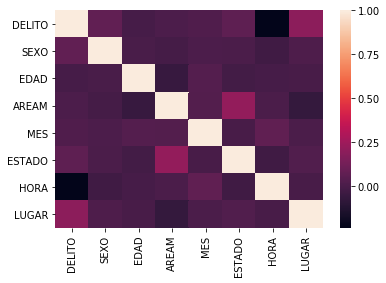

In [11]:
#Mapa de calor con las correlaciones
sb.heatmap( datos_corr )

In [59]:
#Conteo de los datos por sexo
datos['SEXO'].value_counts(normalize=True)
# 1 - Hombre
# 2 - Mujer

2    0.5006
1    0.4994
Name: SEXO, dtype: float64

In [13]:
#Conteo de los datos por mes (en porcentajes)
datos['MES'].value_counts(normalize=True)

12    0.114582
11    0.108390
6     0.091721
10    0.081801
3     0.078888
5     0.077581
2     0.077474
9     0.075995
8     0.073638
7     0.069161
1     0.061233
4     0.060933
99    0.028603
Name: MES, dtype: float64

In [16]:
datos.mean()

DELITO     5.443330
SEXO       1.500600
EDAD      39.298003
AREAM     14.569755
MES        9.608947
ESTADO    15.742448
HORA       2.759909
LUGAR      2.346253
dtype: float64

In [17]:
datos.std()

DELITO     3.071355
SEXO       0.500005
EDAD      15.138732
AREAM     13.768701
MES       15.727619
ESTADO     9.125559
HORA       1.667414
LUGAR      1.706430
dtype: float64

In [18]:
datos.head()

,DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1


In [19]:
datos_norm = ( datos - datos.mean() ) / ( datos.std() )
datos_norm.head()

,DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,-1.121111,-1.00119,-0.548131,-0.04138,-0.356630,-1.615512,0.743721,-0.78893
1,-1.446701,-1.00119,-0.548131,-0.04138,0.024864,-1.615512,0.143990,-0.78893
2,-1.121111,-1.00119,-0.548131,-0.04138,-0.293048,-1.615512,-0.455741,-0.78893
3,1.809192,-1.00119,-0.548131,-0.04138,-0.293048,-1.615512,0.143990,-0.78893
4,0.506835,-1.00119,-0.548131,-0.04138,-0.229466,-1.615512,-1.055472,-0.78893


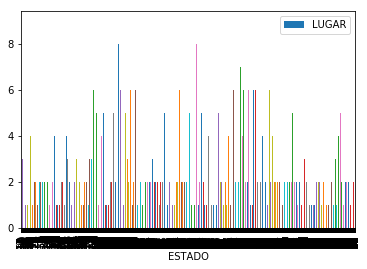

In [43]:
datos.plot(x ='ESTADO', y='LUGAR', kind = 'bar')

In [39]:
# type(datos['ESTADO'].value_counts())

pandas.core.series.Series

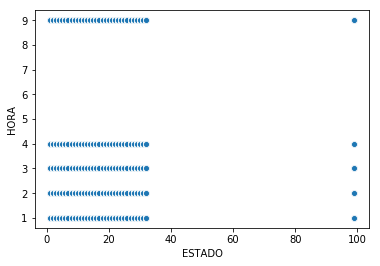

In [24]:
sb_plot = sb.scatterplot( x=datos['ESTADO'], y=datos['HORA'] )
fig = sb_plot.get_figure()

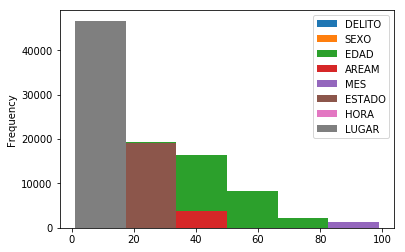

In [30]:
datos.plot.hist( by='ESTADO', bins=6)

In [33]:
# Conteo de datos por delito (en porcentaje)
datos['DELITO'].value_counts(normalize=True)

2     0.165788
5     0.145541
3     0.143377
9     0.137143
4     0.133200
10    0.059926
7     0.054099
8     0.042422
6     0.039165
1     0.029674
11    0.022454
13    0.022218
15    0.001864
14    0.001757
12    0.001371
Name: DELITO, dtype: float64

In [40]:

#datos.plot.pie(y='DELITO',figsize=(5, 5),autopct='%1.1f%%', startangle=90)

In [44]:
# sklearn.linear_model.LogisticRegression(penalty='l2', *, tol=1e-4, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
clf = LogisticRegression(penalty='l2', random_state=0, tol=1e-4, C=1.0, max_iter=100).fit(X, y)
# clf.predict(X[:2, :])

In [56]:
datos_headers = ['SEXO','EDAD','MES','ESTADO','HORA','LUGAR','DELITO']

In [57]:
train_x, test_x, train_y, test_y = train_test_split(datos[datos_headers[:-1]],
datos[datos_headers[-1]], train_size=0.7)

In [58]:
train_x

,SEXO,EDAD,MES,ESTADO,HORA,LUGAR
35541,1,45,8,23,3,1
27597,1,52,8,17,1,3
26227,2,25,2,17,1,4
37585,1,37,3,25,2,1
24065,1,57,5,15,2,8
37255,1,20,9,25,3,1
20593,1,45,10,13,1,3
12780,2,58,3,9,1,9
45121,2,31,9,31,2,4
32070,1,47,8,21,2,4
